<a href="https://colab.research.google.com/github/muhammad-usama-aleem/classification_general_military_tank/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!rm -rf combined
!rm -rf main

In [32]:
!pip install unrar
!unrar x /content/images.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/images.rar

Creating    vehicles                                                  OK
Extracting  vehicles/altay_l1.jpg                                          0%  OK 
Extracting  vehicles/altay_l2.jpg                                          0%  OK 
Extracting  vehicles/altay_l3.jpg                                          0%  OK 
Extracting  vehicles/altay_l4.jpg                                          0%  OK 
Extracting  vehicles/altay_l5.jpg                                          0%  OK 
Extracting  vehicles/altay_l6.jpg                                          0%  OK 
Extracting  vehicles/altay_l7.jpg                                          0%  OK 
Extracting  vehicles/altay_main.jpg                                        0%  OK 
Extracting  vehicles/al_khalid_l1.jpg                                      0%

In [33]:
import os

base_dir = '/content/combined/'
os.mkdir(base_dir)

In [34]:
!mv /content/vehicles /content/combined

In [35]:
!mv /content/general /content/combined

In [36]:
!mv /content/army /content/combined

In [37]:
import os

main_dir = '/content/main/'
os.mkdir(main_dir)

In [38]:
#create two folders (train and validation)
train_dir = os.path.join(main_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(main_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders 

train_cloud_dir = os.path.join(train_dir, 'army')
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'general')
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'vehicle')
os.mkdir(train_rainy_dir)

#Under validation folder create five folders 

validation_cloud_dir = os.path.join(validation_dir, 'army')
os.mkdir(validation_cloud_dir)

validation_foggy_dir = os.path.join(validation_dir, 'general')
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'vehicle')
os.mkdir(validation_rainy_dir)

In [39]:
ARMY_SOURCE_DIR = '/content/combined/army/'
TRAINING_ARMY_DIR = '/content/main/train/army/'
VALID_ARMY_DIR = '/content/main/validation/army/'

GENERAL_SOURCE_DIR = '/content/combined/general/'
TRAINING_GENERAL_DIR = '/content/main/train/general/'
VALID_GENERAL_DIR = '/content/main/validation/general/'

VEHICLE_SOURCE_DIR = '/content/combined/general/'
TRAINING_VEHICLE_DIR = '/content/main/train/vehicle/'
VALID_VEHICLE_DIR = '/content/main/validation/vehicle/'

In [40]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    print(training_length)
    valid_length = int(len(files) - training_length)
    print(valid_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [41]:
import os
import random
from shutil import copyfile

split_size = .85

ARMY_SOURCE_DIR = '/content/combined/army/'
TRAINING_ARMY_DIR = '/content/main/train/army/'
VALID_ARMY_DIR = '/content/main/validation/army/'

GENERAL_SOURCE_DIR = '/content/combined/general/'
TRAINING_GENERAL_DIR = '/content/main/train/general/'
VALID_GENERAL_DIR = '/content/main/validation/general/'

VEHICLE_SOURCE_DIR = '/content/combined/general/'
TRAINING_VEHICLE_DIR = '/content/main/train/vehicle/'
VALID_VEHICLE_DIR = '/content/main/validation/vehicle/'

split_data(ARMY_SOURCE_DIR, TRAINING_ARMY_DIR, VALID_ARMY_DIR, split_size)
split_data(GENERAL_SOURCE_DIR, TRAINING_GENERAL_DIR, VALID_GENERAL_DIR, split_size)
split_data(VEHICLE_SOURCE_DIR, TRAINING_VEHICLE_DIR, VALID_VEHICLE_DIR, split_size)

426
76
436
77
436
77


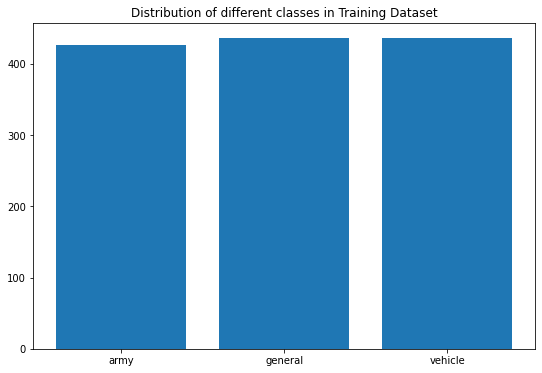

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['army', 'general', 'vehicle']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/main/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

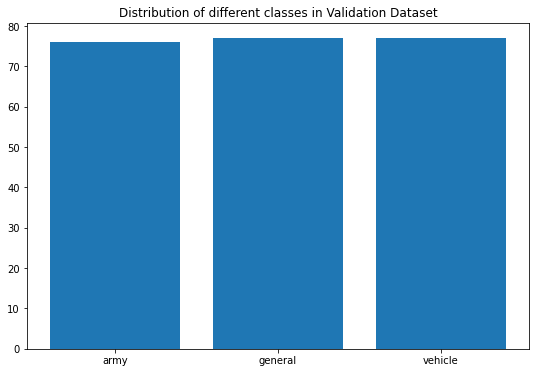

In [43]:
image_folder = ['army', 'general', 'vehicle']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/main/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
img_width=256
img_height=256
batch_size=16

In [46]:
TRAINING_DIR = '/content/main/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1278 images belonging to 3 classes.


In [47]:
VALIDATION_DIR = '/content/main/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 227 images belonging to 3 classes.


In [48]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [53]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 29, 29, 64)       

In [54]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [ ]:

history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

# EfficientNet Implementation

In [94]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('combined')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['army', 'vehicles', 'general']
Types of classes labels found:  3


In [95]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('combined' + '/' +item)
#  print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    # print(class_labels[:5])

In [102]:
print(len(class_labels))

1515


In [96]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                              image
0   army          dataset_path/army/323.png
1   army          dataset_path/army/200.png
2   army          dataset_path/army/126.png
3   army          dataset_path/army/256.png
4   army  dataset_path/army/images (5).jfif
       Labels                                image
1510  general   dataset_path/general/image_832.jpg
1511  general  dataset_path/general/image_1029.jpg
1512  general   dataset_path/general/image_479.jpg
1513  general   dataset_path/general/image_621.jpg
1514  general    dataset_path/general/image_30.jpg


In [104]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1515
general     513
army        502
vehicles    500
Name: Labels, dtype: int64


In [105]:
import cv2
path = 'combined/'
dataset_path = os.listdir('combined')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    print(data_path)
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        # img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_CUBIC)
        try:
           img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_AREA)
           print(img.shape)
        except:
          print(img, f,'------------------------------------------------------------------------------------------')
        images.append(img)
        labels.append(i)

combined/army
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [106]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1515, 224, 224, 3)

In [107]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)
print(len(y))
print(list(set(y)))
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print(y)
print(list(set(y)))

['army' 'army' 'army' ... 'general' 'general' 'general']
1515
['army', 'general', 'vehicles']
[0 0 0 ... 1 1 1]
[0, 1, 2]


In [108]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [109]:
print(images.shape, Y.shape)

(1515, 224, 224, 3) (1515, 3)


In [110]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1212, 224, 224, 3)
(1212, 3)
(303, 224, 224, 3)
(303, 3)


# EfficientNetB0

In [111]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [112]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [113]:
hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Epoch 1/30
38/38 - 260s - loss: 3.1879 - accuracy: 0.4043
Epoch 2/30
38/38 - 247s - loss: 2.3951 - accuracy: 0.4695
Epoch 3/30
38/38 - 247s - loss: 1.3359 - accuracy: 0.6064
Epoch 4/30
38/38 - 244s - loss: 1.3138 - accuracy: 0.6749
Epoch 5/30
38/38 - 248s - loss: 0.8075 - accuracy: 0.7599
Epoch 6/30
38/38 - 247s - loss: 0.7886 - accuracy: 0.7904
Epoch 7/30
38/38 - 248s - loss: 1.0754 - accuracy: 0.7236
Epoch 8/30
38/38 - 246s - loss: 0.7150 - accuracy: 0.8053
Epoch 9/30
38/38 - 246s - loss: 0.7887 - accuracy: 0.8243
Epoch 10/30
38/38 - 247s - loss: 0.6760 - accuracy: 0.8573
Epoch 11/30
38/38 - 247s - loss: 0.5583 - accuracy: 0.8993
Epoch 12/30
38/38 - 251s - loss: 0.6628 - accuracy: 0.8342
Epoch 13/30
38/38 - 247s - loss: 0.5863 - accuracy: 0.8498
Epoch 14/30
38/38 - 248s - loss: 0.4874 - accuracy: 0.8944
Epoch 15/30
38/38 - 252s - loss: 0.3097 - accuracy: 0.9249
Epoch 16/30
38/38 - 251s - loss: 0.2895 - accuracy: 0.9356
Epoch 17/30
38/38 - 255s - loss: 0.2115 - accuracy: 0.9290
Epoch 

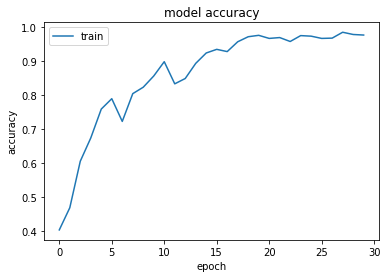

In [115]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [116]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10/10 [==============================] - 14s 1s/step - loss: 1.2081 - accuracy: 0.7756
Loss = 1.2080612182617188
Test Accuracy = 0.7755775451660156


Input image shape: (1, 224, 224, 3)


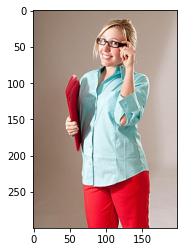

In [117]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/image_885.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [118]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

array([[0., 1., 0.]], dtype=float32)